In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [7]:
gardenX = gf_id.iloc[:1000][['avg_temp', 'min_temp', 'max_temp', 'avg_wind_speed',
       'sunshine_duration', 'precipitation_duration']]
gardenY = gf_id.iloc[:1000][['price']]

X_train_garden, X_test_garden, y_train_garden, y_test_garden = train_test_split(gardenX, gardenY, test_size=0.2)

In [4]:
from sklearn.svm import SVR

rbf_clf = SVR(kernel='rbf')
lin_clf = SVR(kernel='linear')
poly_clf = SVR(kernel='poly')

In [5]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [ ]:
train_and_evaluate(rbf_clf, X_train_garden, X_test_garden, y_train_garden, y_test_garden)
train_and_evaluate(lin_clf, X_train_garden, X_test_garden, y_train_garden, y_test_garden)
train_and_evaluate(poly_clf, X_train_garden, X_test_garden, y_train_garden, y_test_garden)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1]:
import pickle

file_path = './py/rbf_net_sales_wind.sav'
rbf_svr = pickle.load( open(file_path, 'rb') )

In [4]:
gf_id = pd.read_csv('data/group_by_id_2018.csv')
gf_id

,order_id,order_date,place,price,first_stn,second_stn,third_stn,avg_temp,min_temp,max_temp,avg_wind_speed,sunshine_duration,precipitation_duration,mean_air_pressure,avg_cloud_cover,avg_humidity
0,1004533192282720180427,20180427,Aa en Hunze,2109.23,280,286,391,96,49,146,33,61,10111,7,94,48
1,1004533201907820180825,20180825,Aa en Hunze,542.79,280,286,391,122,72,177,35,49,10094,6,95,62
2,1004533203886120180924,20180924,Aa en Hunze,485.93,280,286,391,97,53,142,45,86,10313,4,96,62
3,1004534183230520180127,20180127,Zuidplas,99.97,344,348,391,51,3,77,60,18,10273,7,98,75
4,1004534195169820180528,20180528,Zuidplas,800.93,344,348,391,234,152,294,31,122,10173,6,93,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176122,1080366202965120180913,20180913,Heerhugowaard,1891.93,249,257,391,142,76,208,19,55,-100,-100,-100,-100
176123,1080367193278420180805,20180805,Ten Boer,142.41,280,285,391,187,121,253,25,131,10227,3,97,43
176124,1080367195230820180528,20180528,Ten Boer,1773.55,280,285,391,217,151,283,31,135,10185,4,95,43
176125,1080367195872420180506,20180506,Ten Boer,1229.86,280,285,391,169,69,243,31,142,10242,0,82,33


In [5]:
data_set_size = len(gf_id);

group_by_wind = gf_id.groupby('avg_wind_speed')
price_by_wind = [{'avg_wind_speed': x, 'price': np.sum(group_by_wind.get_group(x).price)} for x in group_by_wind.groups]
price_by_wind = pd.DataFrame(price_by_wind)

gardenX = price_by_wind.iloc[:data_set_size][['avg_wind_speed']]
gardenY = price_by_wind.iloc[:data_set_size][['price']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(gardenY)
gardenY = scaler.transform(gardenY)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

In [11]:
y_pred_garden = rbf_svr.predict(gardenX)

In [12]:
print('MSE 2018: %.3f' % (mean_squared_error(gardenY, y_pred_garden)) )

MSE 2018: 0.263


In [14]:
print('R^2 2018: %.3f' % (r2_score(gardenY, y_pred_garden)) )

R^2 2018: 0.737


MSE 2018: 0.263
R^2 2018: 0.737


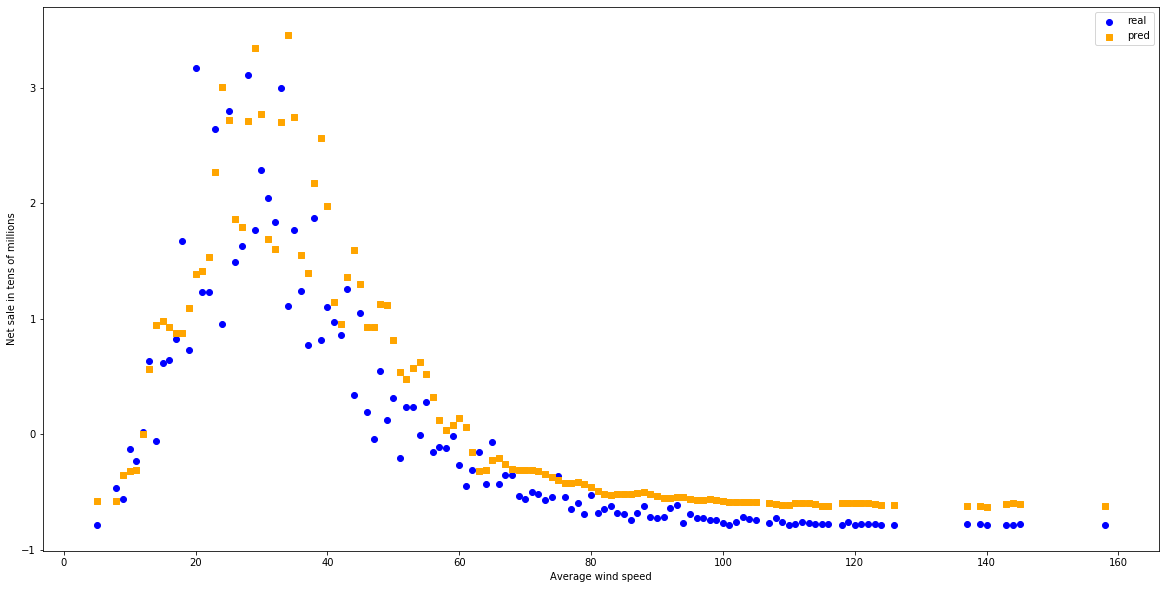

In [21]:
print('MSE 2018: %.3f' % (mean_squared_error(gardenY, y_pred_garden)) )
print('R^2 2018: %.3f' % (r2_score(gardenY, y_pred_garden)) )

plt.figure(figsize=(20,10))
#plt.plot(X_train_garden, y_train_pred, color="red", label="Model")
plt.scatter(gardenX, gardenY, c="blue", marker='o', label="real")
plt.scatter(gardenX, y_pred_garden, c="orange", marker='s', label="pred")
plt.xlabel('Average wind speed')
plt.ylabel('Net sale in tens of millions')
plt.legend()
plt.show()